# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [122]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path = '../data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

train_Y = np.log1p(df_train['SalePrice'])
df = df_train.drop(['Id', 'SalePrice'] , axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [123]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [124]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)
MMEncoder = MinMaxScaler()
train_num = train_Y.shape[0]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

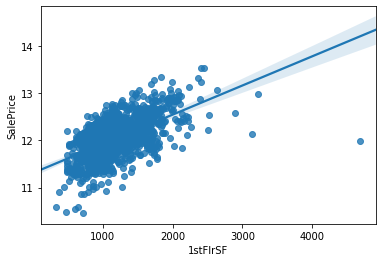

0.8406188285118624

In [125]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

In [126]:
bins=pd.cut(df['1stFlrSF'],20)
df['1stFlrSF'].groupby(bins).count()

1stFlrSF
(329.642, 551.9]     24
(551.9, 769.8]      141
(769.8, 987.7]      394
(987.7, 1205.6]     341
(1205.6, 1423.5]    217
(1423.5, 1641.4]    168
(1641.4, 1859.3]    113
(1859.3, 2077.2]     34
(2077.2, 2295.1]     16
(2295.1, 2513.0]      5
(2513.0, 2730.9]      3
(2730.9, 2948.8]      1
(2948.8, 3166.7]      1
(3166.7, 3384.6]      1
(3384.6, 3602.5]      0
(3602.5, 3820.4]      0
(3820.4, 4038.3]      0
(4038.3, 4256.2]      0
(4256.2, 4474.1]      0
(4474.1, 4692.0]      1
Name: 1stFlrSF, dtype: int64

1stFlrSF
(329.642, 551.9]    AxesSubplot(0.125,0.125;0.775x0.755)
(551.9, 769.8]      AxesSubplot(0.125,0.125;0.775x0.755)
(769.8, 987.7]      AxesSubplot(0.125,0.125;0.775x0.755)
(987.7, 1205.6]     AxesSubplot(0.125,0.125;0.775x0.755)
(1205.6, 1423.5]    AxesSubplot(0.125,0.125;0.775x0.755)
(1423.5, 1641.4]    AxesSubplot(0.125,0.125;0.775x0.755)
(1641.4, 1859.3]    AxesSubplot(0.125,0.125;0.775x0.755)
(1859.3, 2077.2]    AxesSubplot(0.125,0.125;0.775x0.755)
(2077.2, 2295.1]    AxesSubplot(0.125,0.125;0.775x0.755)
(2295.1, 2513.0]    AxesSubplot(0.125,0.125;0.775x0.755)
(2513.0, 2730.9]    AxesSubplot(0.125,0.125;0.775x0.755)
(2730.9, 2948.8]    AxesSubplot(0.125,0.125;0.775x0.755)
(2948.8, 3166.7]    AxesSubplot(0.125,0.125;0.775x0.755)
(3166.7, 3384.6]    AxesSubplot(0.125,0.125;0.775x0.755)
(3384.6, 3602.5]    AxesSubplot(0.125,0.125;0.775x0.755)
(3602.5, 3820.4]    AxesSubplot(0.125,0.125;0.775x0.755)
(3820.4, 4038.3]    AxesSubplot(0.125,0.125;0.775x0.755)
(4038.3, 4256.2]    Ax

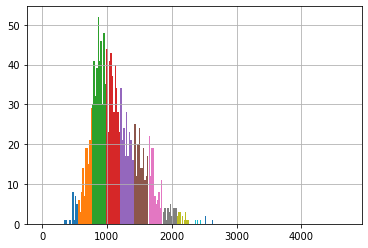

In [86]:
df['1stFlrSF'].groupby(bins).hist()

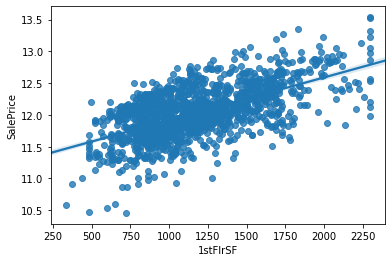

0.8866335827688294

In [87]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
"""
Your Code Here
"""
df['1stFlrSF']=df['1stFlrSF'].clip(329.642,2295)
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

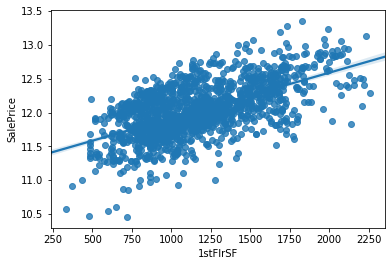

0.8903639252879316

In [97]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
"""
Your Code Here
"""
keep_indexs=(df['1stFlrSF'] > 329.642) & (df['1stFlrSF'] < 2295)
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()
df = df[keep_indexs]
train_Y=train_Y[keep_indexs]
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()